In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import ylabel
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
df = pd.read_csv("/home/satire/PycharmProjects/Statistics/csv/Salary_Data.xls")
df.sample(10)

,YearsExperience,Salary
12,4.0,56957.0
8,3.2,64445.0
13,4.1,57081.0
19,6.0,93940.0
24,8.7,109431.0
11,4.0,55794.0
21,7.1,98273.0
3,2.0,43525.0
0,1.1,39343.0
15,4.9,67938.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [30]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


<Axes: xlabel='YearsExperience', ylabel='Salary'>

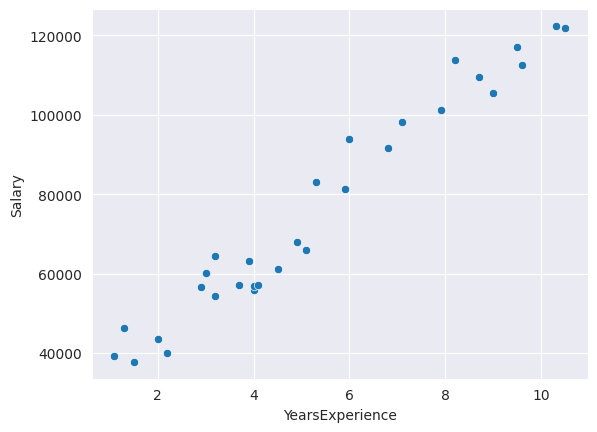

In [31]:
sns.scatterplot(data=df, x="YearsExperience", y="Salary")

In [32]:
X = df['YearsExperience'].to_numpy().reshape(-1,1)
y = df['Salary'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [33]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

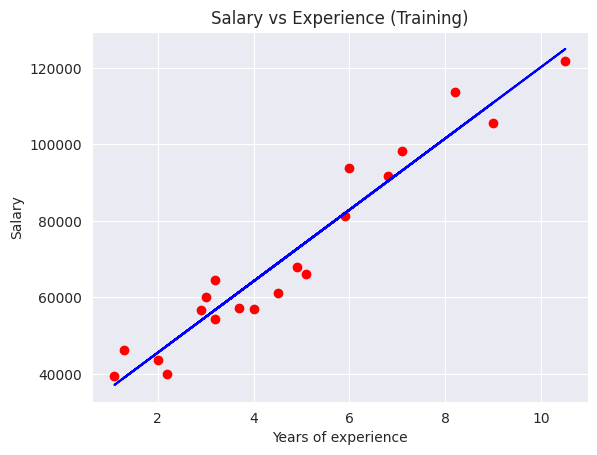

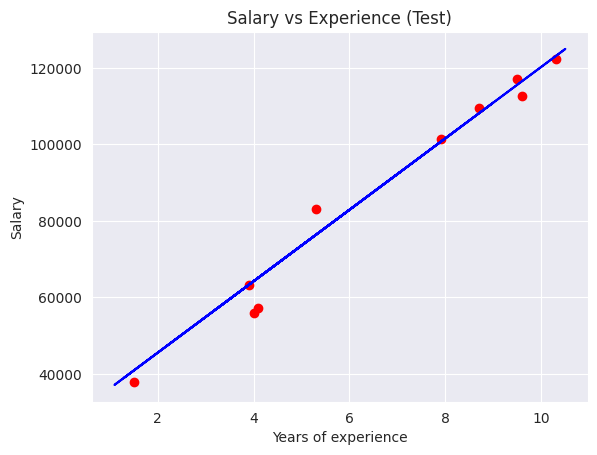

In [34]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')
plt.title("Salary vs Experience (Training)")
plt.xlabel("Years of experience")
plt.ylabel('Salary')
plt.show()

plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, reg.predict(X_train), color="blue")
plt.title("Salary vs Experience (Test)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [35]:
r_sq = reg.score(X_test, y_test)
y_test_pred = reg.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"coefficient of determination(r2_score): {r_sq}")
print(f"intercept: {reg.intercept_}")
print(f"slope: {reg.coef_}")

Mean squared error: 21026037.33
coefficient of determination(r2_score): 0.9749154407708353
intercept: 26816.192244031183
slope: [9345.94244312]


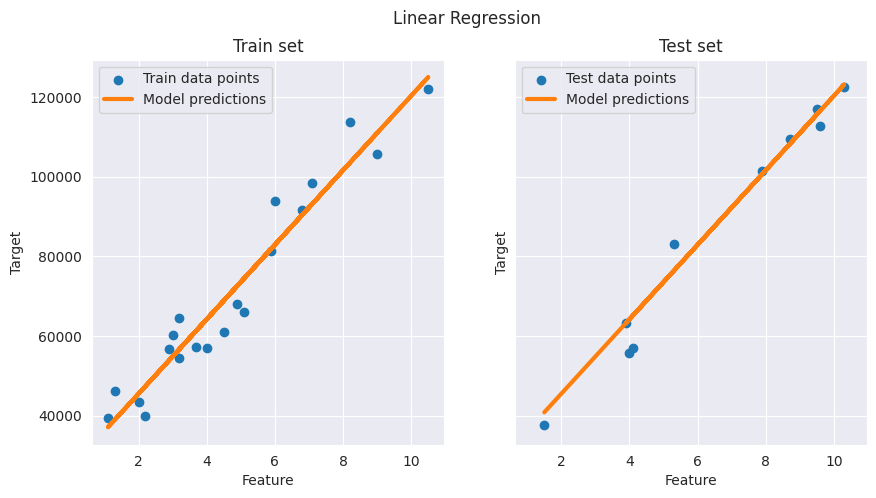

In [36]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)
ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    reg.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()
fig.suptitle("Linear Regression")
plt.show()

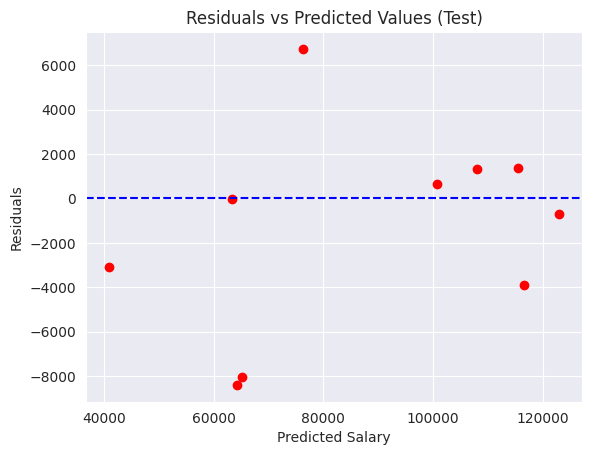

In [37]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.title("Residuals vs Predicted Values (Test)")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.show()

Stats models package

In [38]:
predictor = df['YearsExperience'].to_numpy().reshape(-1,1)
outcome = df['Salary']

In [39]:
model = LinearRegression()
model.fit(predictor, outcome)

LinearRegression()

In [40]:
print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient exposure: {model.coef_[0]:.3f}')

Intercept: 25792.200
Coefficient exposure: 9449.962


In [41]:
fitted = model.predict(predictor)
residuals = outcome - fitted